In [54]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#import tensorflow
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.fftpack import fft, fftfreq

## Datei einlesen und FFT erstellen

In [55]:
cwd = os.getcwd()
src_dir = os.path.join(cwd, os.pardir)
data_dir = os.path.join(src_dir, 'data')

raw_sound_data, samplerate = sf.read('../data/11_1.flac')

# Konvertierung in ein angenehmeres Format 
sound_data = {}
#sound_data['front-left'] = [x[2] for x in raw_sound_data]
#sound_data['front-right'] = [x[3] for x in raw_sound_data]
sound_data['back-left'] = [x[0] for x in raw_sound_data]
#sound_data['back-right'] = [x[1] for x in raw_sound_data]

fft_data = fft(sound_data['back-left'][sample_index(212):sample_index(213)])

## Speichern und Laden

Funktion zum umwandeln der Timestamps zu konkreten Indizes im Waveform Array

In [56]:
def sample_index(timestamp):
    return timestamp * samplerate

Plot

44100


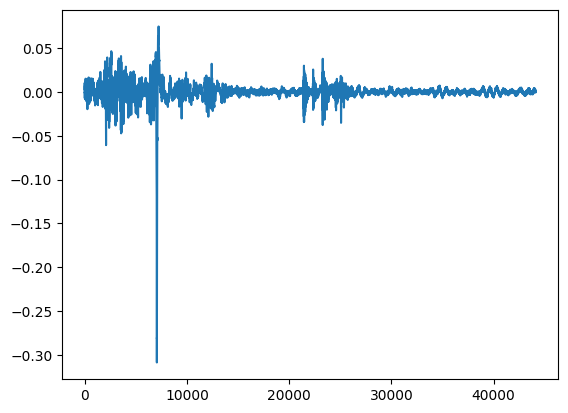

In [45]:
plt.plot(sound_data['back-left'][sample_index(0):sample_index(1)])
print(samplerate)

### no whistle
FFT für eine Sekunde ohne Pfiff

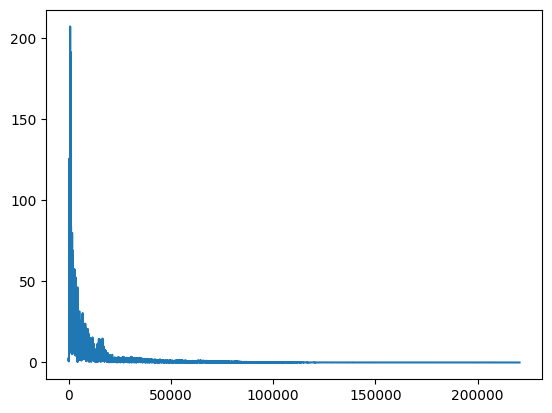

In [51]:
fft_data = fft(sound_data['back-left'][sample_index(211):sample_index(212)])
fft_freq = fftfreq(sample_index(212) - sample_index(211), 1/441000)
plt.plot(fft_freq[:fft_freq.size//2], np.abs(fft_data)[:fft_data.size//2])

### whistle
FFT für eine Sekunde mit Pfiff

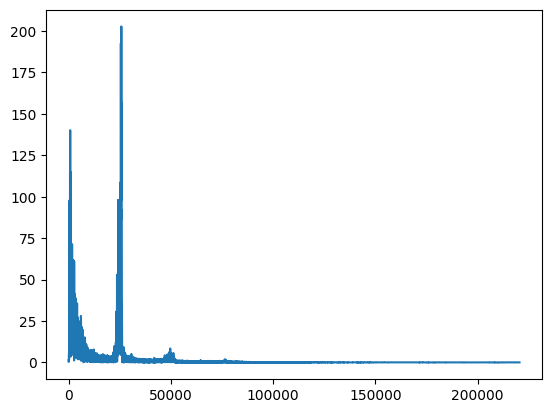

In [52]:
fft_data = fft(sound_data['back-left'][sample_index(212):sample_index(213)])
fft_freq = fftfreq(sample_index(213) - sample_index(212), 1/441000)
plt.plot(fft_freq[:fft_freq.size//2], np.abs(fft_data)[:fft_data.size//2])

In [57]:
np.savez('11_1', fft_mag=np.abs(fft_data), fft_phase=np.angle(fft_data))

In [58]:
data_load = np.load('11_1.npz')
fft_data_load = data_load['fft_mag'] + 1j * data_load['fft_phase']

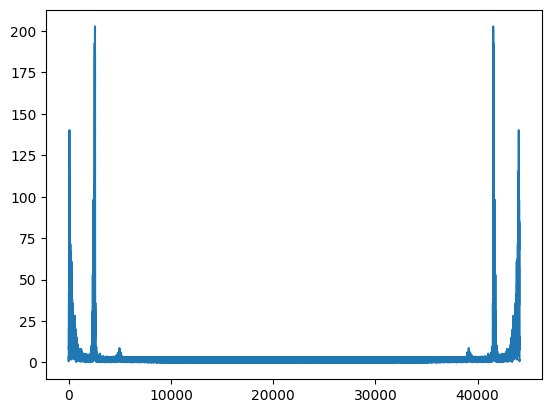

In [59]:
plt.plot(np.abs(fft_data_load))